In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm

In [ ]:
df_train = pd.read_csv('/content/train .csv')
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


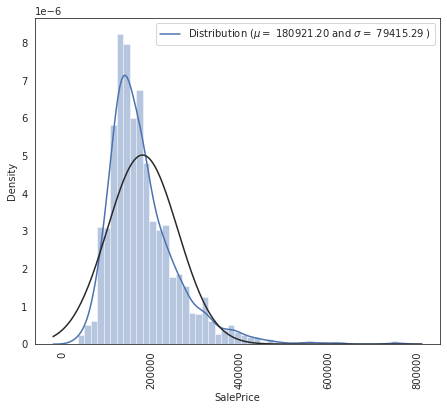

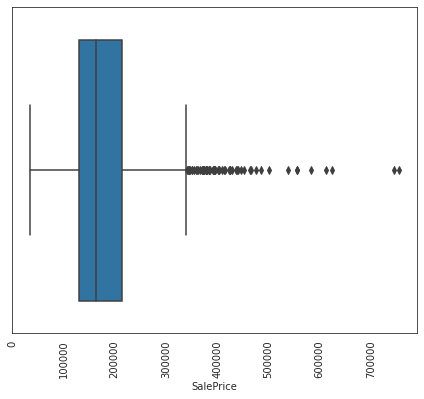

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')

f, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'] , fit=norm, color="b");
(mu, sigma) = norm.fit(df_train['SalePrice'])

plt.legend(['Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
#ax.set(title="SalePrice distribution")
plt.xticks(rotation=90);
#sns.despine(trim=True, left=True)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.boxplot(x = df_train['SalePrice'])
plt.xticks(rotation=90);
plt.show()

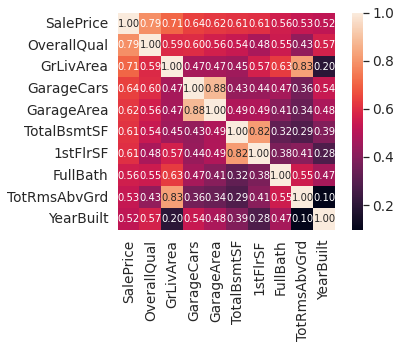

In [ ]:
correlation_matrix = df_train.corr().round(2)
n = 10 #top number of variables for heatmap
cols = correlation_matrix.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn import preprocessing
import statsmodels.api as sm

#to normalize the predictor variable
df_train["GrLivArea_pre"] = preprocessing.scale(df_train.GrLivArea.values)

model = sm.OLS.from_formula("SalePrice ~ GrLivArea_pre", data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.52e-223
Time:                        04:42:49   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.809e+05   1467.490    123.286      0.000    1.78e+05    1.84e+05
GrLivArea_pre  5.628e+04   1467.490     38.348      0.000    5.34e+04    5.92e+04
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_train['OverallQualx'] = df_train.OverallQual.replace({1: 'Very Poor', 2: 'Poor', 3: 'Fair', 4: 'Below Average',
                                                    5: 'Average', 6:'Above Average', 7: 'Good', 8: 'Very Good',
                                                       9: 'Excellent', 10: 'Very Excellent'})

model = sm.OLS.from_formula("SalePrice ~ GrLivArea + OverallQualx", data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     458.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        04:42:55   Log-Likelihood:                -17503.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1449   BIC:                         3.509e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       8.449e+04   4139.960     20.410      0.000    7.64e+04    9.26e+04
OverallQualx[T.Average]        -1.676e+04   2865.399     -5.850      0.000   -2.24e+04   -1.11e+04
OverallQualx[T.Below Average]  -3.429e+04   4246.272     -8.075      0.000   -4.26e+04    -2.6e+04
OverallQualx[T.Excellent]       1.737e+05   6470.548     26.850      0.000    1.61e+05    1.86e+05
OverallQualx[T.Fair]           -5.589e+04   9009.114     -6.204      0.000   -7.36e+04   -3.82e+04
OverallQualx[T.Good]             3.36e+04   3035.435     11.068      0.000    2.76e+04    3.96e+04
OverallQualx[T.Poor]           -6.285e+04   2.28e+04     -2.762      0.006   -1.07e+05   -1.82e+04
OverallQualx[T.Very Excellent]  1.962e+05   1.02e+04     19.311      0.000    1.76e+05    2.16e+05
OverallQualx[T.Very Good]       8.779e+04   3818.692     22.990      0.000    8.03e+04    9.53e+04
OverallQualx[T.Very Poor]      -6.691e+04   2.78e+04     -2.408      0.016   -1.21e+05   -1.24e+04
GrLivArea                         52.6024      2.465     21.340      0.000      47.767      57.438
==============================================================================
Omnibus:                      401.609   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17708.041
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                      20.033   Cond. No.                     4.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_train["GarageArea_pre"] = preprocessing.scale(df_train.GarageArea.values)

# 4 variables
model = sm.OLS.from_formula("SalePrice ~ GrLivArea_pre + OverallQualx + GarageArea_pre", data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     461.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        04:43:02   Log-Likelihood:                -17446.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1448   BIC:                         3.498e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.666e+05   1959.216     85.039      0.000    1.63e+05     1.7e+05
OverallQualx[T.Average]        -1.492e+04   2760.851     -5.406      0.000   -2.03e+04   -9508.405
OverallQualx[T.Below Average]  -2.927e+04   4109.555     -7.123      0.000   -3.73e+04   -2.12e+04
OverallQualx[T.Excellent]       1.566e+05   6418.979     24.393      0.000    1.44e+05    1.69e+05
OverallQualx[T.Fair]           -5.066e+04   8677.424     -5.839      0.000   -6.77e+04   -3.36e+04
OverallQualx[T.Good]             2.84e+04   2957.956      9.600      0.000    2.26e+04    3.42e+04
OverallQualx[T.Poor]           -5.194e+04   2.19e+04     -2.371      0.018   -9.49e+04   -8962.963
OverallQualx[T.Very Excellent]  1.759e+05   9948.055     17.682      0.000    1.56e+05    1.95e+05
OverallQualx[T.Very Good]       7.449e+04   3870.117     19.248      0.000    6.69e+04    8.21e+04
OverallQualx[T.Very Poor]      -4.418e+04   2.68e+04     -1.648      0.099   -9.68e+04    8392.179
GrLivArea_pre                   2.497e+04   1269.027     19.676      0.000    2.25e+04    2.75e+04
GarageArea_pre                  1.341e+04   1230.513     10.894      0.000     1.1e+04    1.58e+04
==============================================================================
Omnibus:                      461.139   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29260.934
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                      24.900   Cond. No.                         33.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_train[["OverallQual", "GrLivArea_pre", "GarageArea_pre"]].corr()

,OverallQual,GrLivArea_pre,GarageArea_pre
OverallQual,1.000000,0.593007,0.562022
GrLivArea_pre,0.593007,1.000000,0.468997
GarageArea_pre,0.562022,0.468997,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


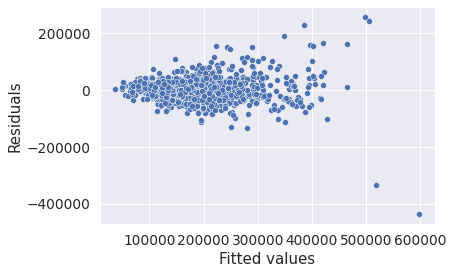

In [ ]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")